In [1]:
import pylab as plt
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os, sys
from PIL import Image
from scipy import signal

from sklearn.decomposition import FastICA, PCA
%matplotlib inline


# Separación de fuentes

In [2]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix


# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

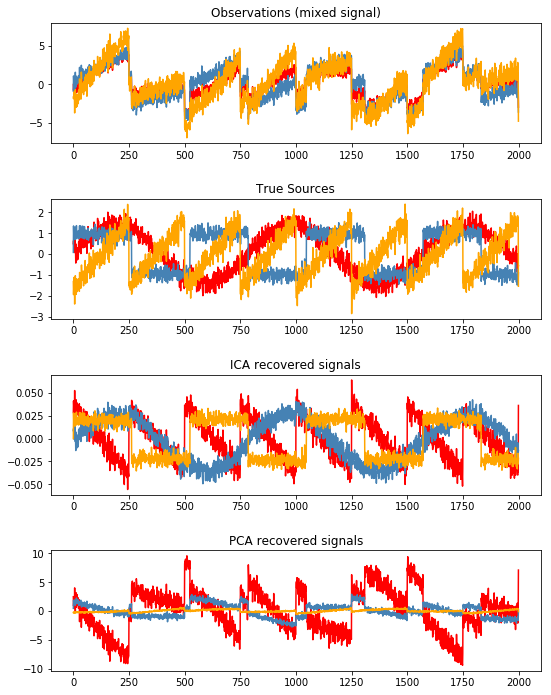

In [3]:
plt.figure(figsize = (8,10))

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

# Ahora con imágenes

Imagenes super espectrales http://www.cs.columbia.edu/CAVE/databases/multispectral/.

Tienen diferentes imagenes de una camara hyperespectral

In [4]:
path = "data/images"
im_array = []
for file in os.listdir(path):
    if file.endswith(".png"):
        foo = Image.open(os.path.join(path, file))
        foo = foo.resize((100,100),Image.ANTIALIAS)
        image = np.array(foo)
        im = np.reshape(image, (1, 100*100))
        im_array.append(im)
print(len(im_array))
im_array =np.reshape(np.array(im_array), (31, 100*100))
print(im_array.shape)
n_samples, n_features = im_array.shape
im_array = im_array - im_array.mean(axis=0)
im_array -= im_array.mean(axis=1).reshape(n_samples, -1)
n_row, n_col = 2, 5
n_components = n_row * n_col
image_shape = (100, 100)


31
(31, 10000)


In [5]:
def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(3. * n_col, 3.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape),cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

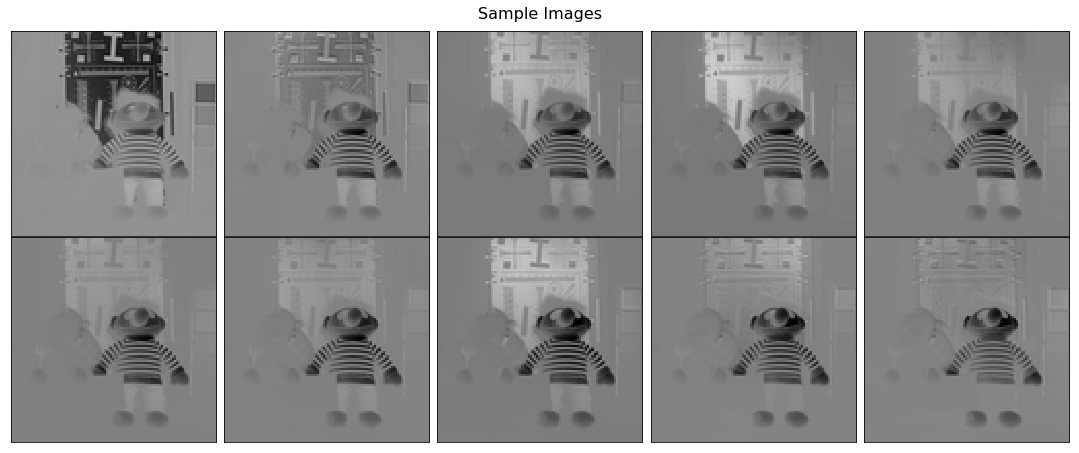

In [6]:
plot_gallery('Sample Images', im_array[1:11,:])

In [7]:
ica = FastICA(n_components=3, whiten=True)
ica.fit(im_array)

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=3, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

In [8]:
ica.components_.shape

(3, 10000)

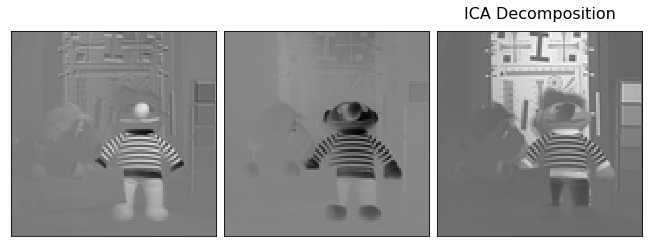

In [9]:
 plot_gallery('ICA Decomposition',ica.components_[:n_components])

(4, 10000)


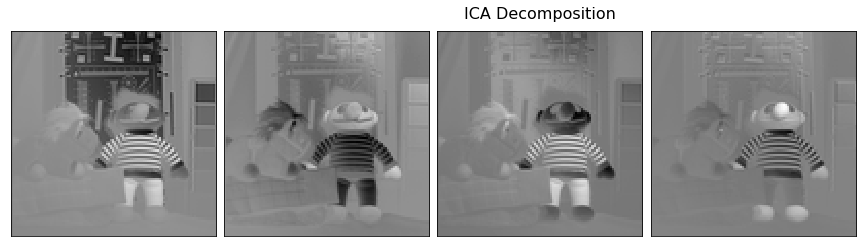

In [8]:
ica = FastICA(n_components=4, whiten=True)
ica.fit(im_array)
print(ica.components_.shape)
plot_gallery('ICA Decomposition',ica.components_[:n_components])

In [10]:
path = "data/images2"
im_array = []
for file in os.listdir(path):
    if file.endswith(".png"):
        foo = Image.open(os.path.join(path, file))
        foo = foo.resize((100,100),Image.ANTIALIAS)
        image = np.array(foo)
        im = np.reshape(image, (1, 100*100))
        im_array.append(im)
print (len(im_array))
im_array =np.reshape(np.array(im_array), (31, 100*100))
print (im_array.shape)
n_samples, n_features = im_array.shape
im_array = im_array - im_array.mean(axis=0)
im_array -= im_array.mean(axis=1).reshape(n_samples, -1)
n_row, n_col = 2, 5
n_components = n_row * n_col
image_shape = (100, 100)

31
(31, 10000)


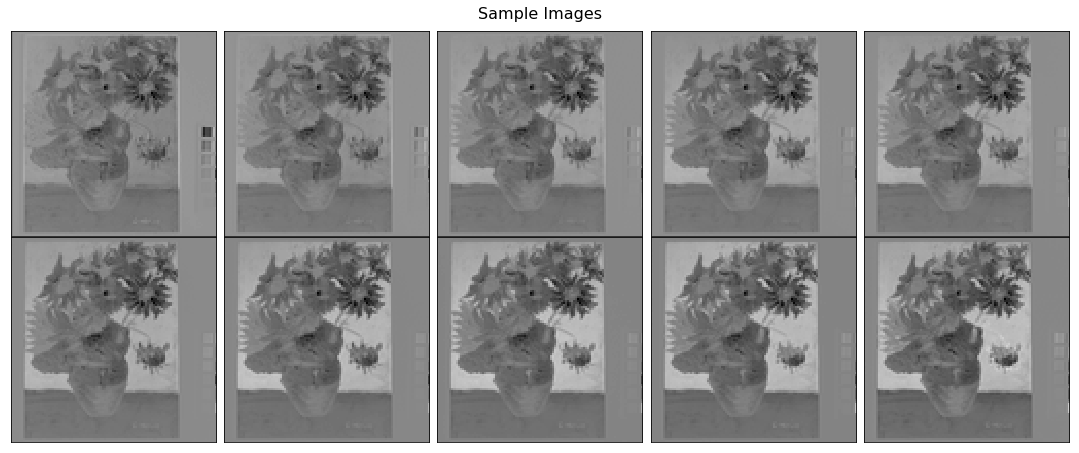

In [11]:
plot_gallery('Sample Images', im_array[1:11,:])

(5, 10000)


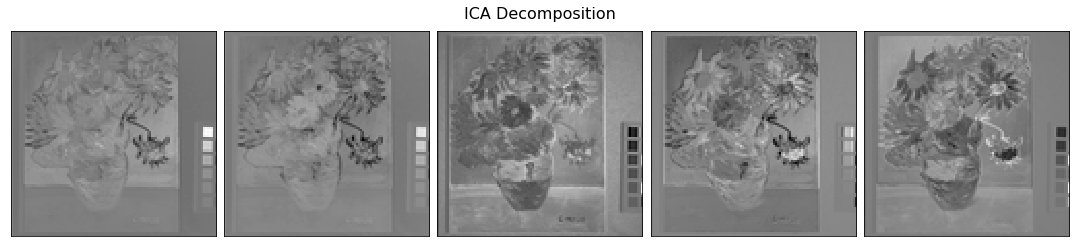

In [12]:
ica = FastICA(n_components=5, whiten=True)
ica.fit(im_array)
print (ica.components_.shape)
plot_gallery('ICA Decomposition',ica.components_[:n_components])

Bibliografía: https://github.com/leonpalafox/mlclase/blob/master/Chapter8PCAICA/ICA%20analysis.ipynb